In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.arima_model import ARIMA


In [2]:
# Load Series, aggiornati al 15/06/2022
GOOGL=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/GOOGL.csv")
NKE = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/NKE.csv")
HD = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/HD.csv")
JPM = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/JPM.csv")
BA= pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/BA.csv")
JNJ = pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/JNJ.csv")
AAPL=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/AAPL.csv")
INTC=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/INTC.csv")
MCD=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/MCD.csv")
TRV=pd.read_csv("E:/Laurea Magistrale/Artificial intelligence and deep learning/Esame/Financial Series/TRV.csv")

In [3]:
#GOOGL.info()
# faccio un merge verticale dei dati, creo la colonna di indentificazione del titolo e formatto la data
GOOGL.insert(7,column="Stock",value=np.repeat("GOOGL",3525))
NKE.insert(7,column="Stock",value=np.repeat("NKE",3525))
HD.insert(7, column="Stock", value=np.repeat("HD", 3525))
AAPL.insert(7, column="Stock", value=np.repeat("AAPL", 3525))
BA.insert(7, column="Stock", value=np.repeat("BA", 3525))
INTC.insert(7, column="Stock", value=np.repeat("INTC", 3525))
JNJ.insert(7, column="Stock", value=np.repeat("JNJ", 3525))
MCD.insert(7, column="Stock", value=np.repeat("MCD", 3525))
TRV.insert(7, column="Stock", value=np.repeat("TRV", 3525))
JPM.insert(7, column="Stock", value=np.repeat("JPM", 3525))
Series = pd.merge(GOOGL, NKE, how='outer')
Series = pd.merge(Series, HD, how='outer')
Series = pd.merge(Series, AAPL, how = 'outer')
Series = pd.merge(Series, BA, how='outer')
Series = pd.merge(Series, INTC, how = 'outer')
Series = pd.merge(Series, JNJ, how = 'outer')
Series = pd.merge(Series, MCD, how = 'outer')
Series = pd.merge(Series, TRV, how = 'outer')
Series = pd.merge(Series, JPM, how = 'outer')
Series['Date']=pd.to_datetime(Series['Date'])
Series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35250 entries, 0 to 35249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       35250 non-null  datetime64[ns]
 1   Open       35250 non-null  float64       
 2   High       35250 non-null  float64       
 3   Low        35250 non-null  float64       
 4   Close      35250 non-null  float64       
 5   Adj Close  35250 non-null  float64       
 6   Volume     35250 non-null  int64         
 7   Stock      35250 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.4+ MB


ANALISI ESPLORATIVA:
Verrà effettuata un'analisi esplorativa sia grafica sull'andamento dei prezzi di apertura, sia volta a studiare la forza della correlazione seriale
di ogni titolo ed eventuale presenza di cointegrazione fra i titoli.

Text(32.28923611111111, 0.5, 'Open Price')

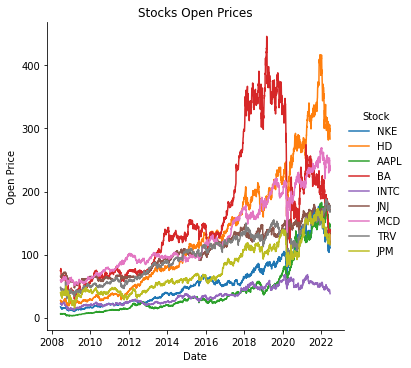

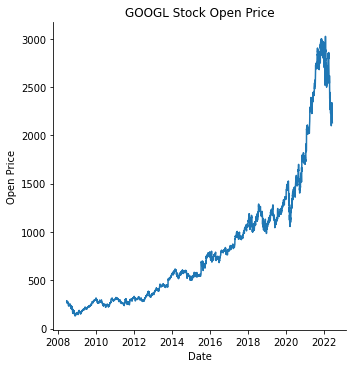

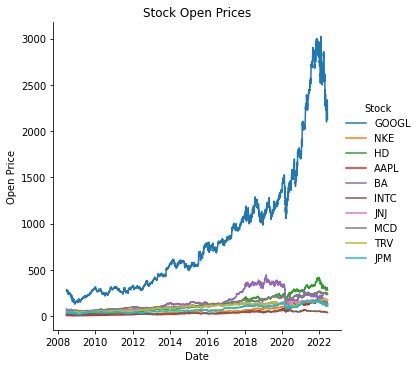

In [26]:
sns.relplot(x="Date", y="Open", data=Series[Series['Stock']!="GOOGL"], kind="line", hue="Stock")
plt.ylabel("Open Price")
plt.title("Stocks Open Prices")
sns.relplot(x="Date", y="Open", data=Series[Series['Stock']=="GOOGL"], kind = "line")
plt.title("GOOGL Stock Open Price")
plt.ylabel("Open Price")
#------- serie insieme -----------------
sns.relplot(x="Date", y="Open", data=Series, kind='line', hue="Stock")
plt.title("Stock Open Prices")
plt.ylabel("Open Price")

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


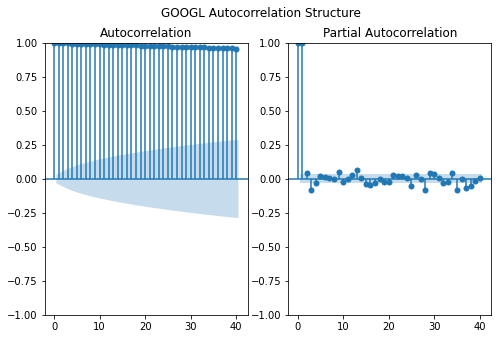

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


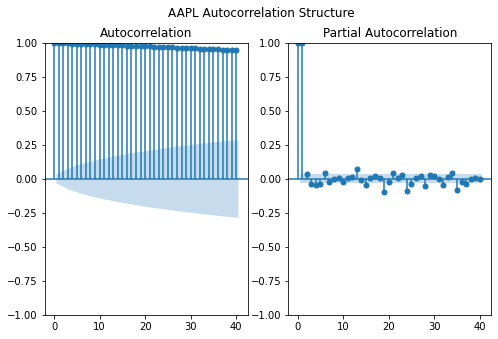

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


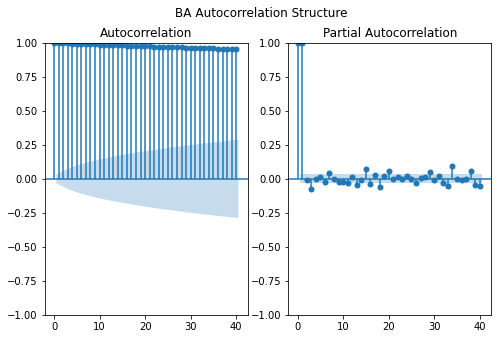

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


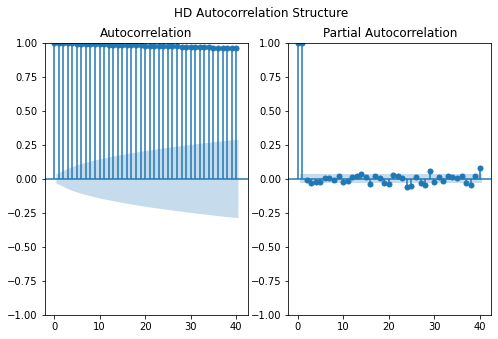

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


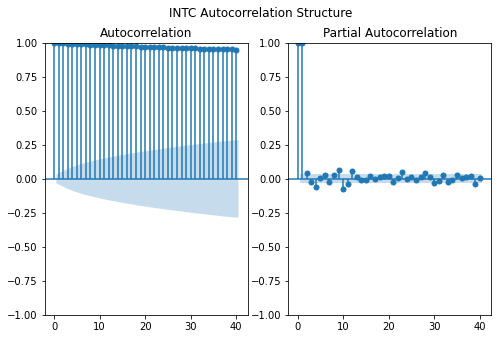

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


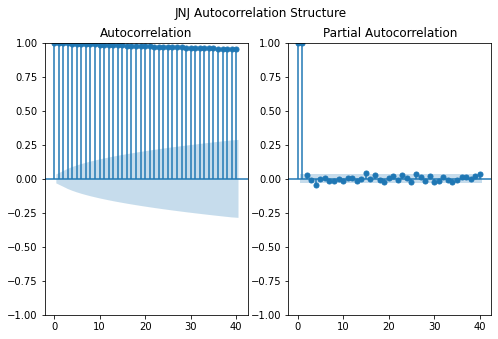

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


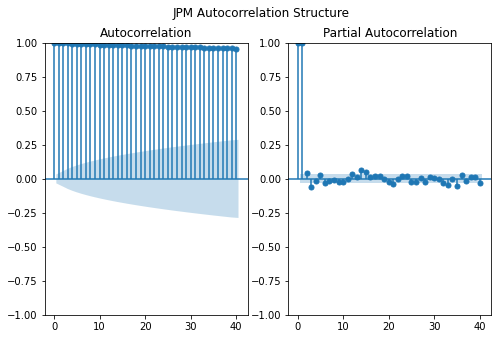

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


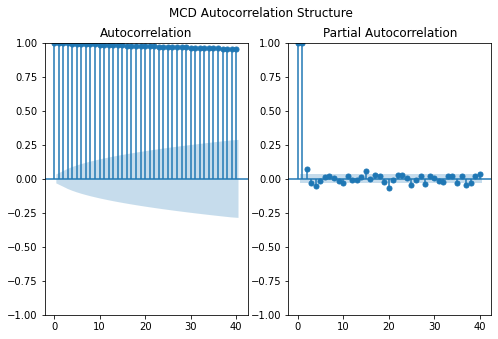

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


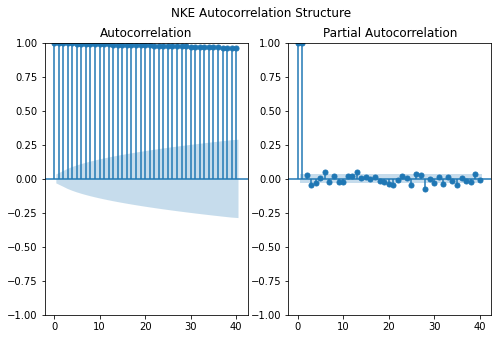

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


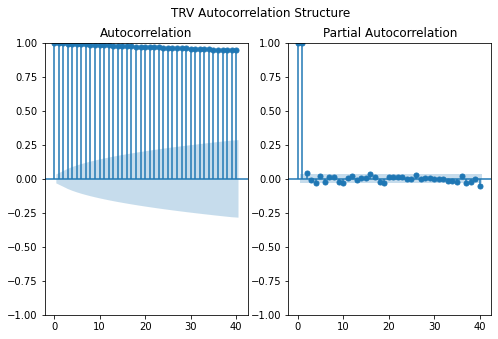

In [28]:
# ACF E PACF di ogni serie; utile anche a capire l'ordine del modello ARIMA
#-- GOOGL
fig, ax = plt.subplots(1,2,figsize=(8,5))
plot_acf(GOOGL['Open'], lags=40, ax=ax[0])
plot_pacf(GOOGL['Open'], lags=40, ax=ax[1])
plt.suptitle("GOOGL Autocorrelation Structure")
plt.show()

#-- AAPL
fig, ax = plt.subplots(1,2,figsize=(8,5))
plot_acf(AAPL['Open'], lags=40, ax=ax[0])
plot_pacf(AAPL['Open'], lags=40, ax=ax[1])
plt.suptitle("AAPL Autocorrelation Structure")
plt.show()

#-- BA
fig, ax = plt.subplots(1,2,figsize=(8,5))
plot_acf(BA['Open'], lags=40, ax=ax[0])
plot_pacf(BA['Open'], lags=40, ax=ax[1])
plt.suptitle("BA Autocorrelation Structure")
plt.show()

#-- HD
fig, ax = plt.subplots(1,2,figsize=(8,5))
plot_acf(HD['Open'], lags=40, ax=ax[0])
plot_pacf(HD['Open'], lags=40, ax=ax[1])
plt.suptitle("HD Autocorrelation Structure")
plt.show()

#-- INTC
fig, ax = plt.subplots(1,2,figsize=(8,5))
plot_acf(INTC['Open'], lags=40, ax=ax[0])
plot_pacf(INTC['Open'], lags=40, ax=ax[1])
plt.suptitle("INTC Autocorrelation Structure")
plt.show()

#-- JNJ
fig, ax = plt.subplots(1,2,figsize=(8,5))
plot_acf(JNJ['Open'], lags=40, ax=ax[0])
plot_pacf(JNJ['Open'], lags=40, ax=ax[1])
plt.suptitle("JNJ Autocorrelation Structure")
plt.show()

#-- JPM
fig, ax = plt.subplots(1,2,figsize=(8,5))
plot_acf(JPM['Open'], lags=40, ax=ax[0])
plot_pacf(JPM['Open'], lags=40, ax=ax[1])
plt.suptitle("JPM Autocorrelation Structure")
plt.show()

#-- MCD
fig, ax = plt.subplots(1,2,figsize=(8,5))
plot_acf(MCD['Open'], lags=40, ax=ax[0])
plot_pacf(MCD['Open'], lags=40, ax=ax[1])
plt.suptitle("MCD Autocorrelation Structure")
plt.show()

#--NKE
fig, ax = plt.subplots(1,2,figsize=(8,5))
plot_acf(NKE['Open'], lags=40, ax=ax[0])
plot_pacf(NKE['Open'], lags=40, ax=ax[1])
plt.suptitle("NKE Autocorrelation Structure")
plt.show()

#-- TRV
fig, ax = plt.subplots(1,2,figsize=(8,5))
plot_acf(TRV['Open'], lags=40, ax=ax[0])
plot_pacf(TRV['Open'], lags=40, ax=ax[1])
plt.suptitle("TRV Autocorrelation Structure")
plt.show()

In [43]:
##
## TEST DI COINTEGRAZIONE DI JOHANSEN
##
series2 = pd.pivot(data=Series, index="Date", columns="Stock", values="Open") # time series in wider format.

# Definisco una nuova funzione che permette di visualizzare anche un summary del test
def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)
    # Summary
    print("Perform Johanson's Cointegration Test and Report Summary \n",'--'*20)
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
    
cointegration_test(series2)



Perform Johanson's Cointegration Test and Report Summary 
 ----------------------------------------
Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
AAPL   ::  232.16    > 219.4051  =>   True
BA     ::  167.17    > 179.5199  =>   False
GOOGL  ::  120.45    > 143.6691  =>   False
HD     ::  86.13     > 111.7797  =>   False
INTC   ::  57.42     > 83.9383   =>   False
JNJ    ::  36.4      > 60.0627   =>   False
JPM    ::  22.23     > 40.1749   =>   False
MCD    ::  13.39     > 24.2761   =>   False
NKE    ::  6.83      > 12.3212   =>   False
TRV    ::  1.56      > 4.1296    =>   False
